In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
from collections import Counter

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
!pwd

/home/jhon/Documents/Personal_Plan/Project_3_ChurnRatePrediction/projectChurnRate


# 1. Dataset 
source: 
- https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- https://github.com/Paritoshyadav/Minimizing-Churn-Rate-Through-Analysis-of-Financial-Habits
- https://github.com/Azure-Samples/MachineLearningSamples-ChurnPrediction


## A brief dataset exploration:

In [8]:
# Carga los datos 
dfChurnTelco = pd.read_csv('../projectChurnRate/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=0)

print("Tamaño del conjunto de datos:  %d" % dfChurnTelco.shape[0])
print("Número de variables: %d" % dfChurnTelco.shape[1])
if dfChurnTelco.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
dfChurnTelco.head()

Tamaño del conjunto de datos:  7043
Número de variables: 20
El índice es único.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
!cd Data && ls

CATelcoCustomerChurnTrainingSample.csv	WA_Fn-UseC_-Telco-Customer-Churn.csv
churn_data.csv


In [7]:
# Carga los datos 
dfChurnBank = pd.read_csv('../projectChurnRate/Data/churn_data.csv', index_col=0)
#$dfChurnBank = pd.read_csv('../projectChurnRate/Data/churn_data.csv')

print("Tamaño del conjunto de datos:  %d" % dfChurnBank.shape[0])
print("Número de variables: %d" % dfChurnBank.shape[1])
if dfChurnBank.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
dfChurnBank.head()

Tamaño del conjunto de datos:  27000
Número de variables: 30
Los índices están duplicados.


,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,
55409,0,37.0,na,NaN,0,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
23547,0,28.0,R,486.0,0,0,1,0,0,96,...,0,0,0,0,Leo,0,0,44.0,1.47,1
58313,0,35.0,R,561.0,47,2,86,47,0,285,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
8095,0,26.0,R,567.0,26,3,38,25,0,74,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
61353,1,27.0,na,NaN,0,0,2,0,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
# Carga los datos 
dfChurnTelco2 = pd.read_csv('../projectChurnRate/Data/CATelcoCustomerChurnTrainingSample.csv', index_col=0)

print("Tamaño del conjunto de datos:  %d" % dfChurnTelco2.shape[0])
print("Número de variables: %d" % dfChurnTelco2.shape[1])
if dfChurnTelco2.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
dfChurnTelco2.head()

Tamaño del conjunto de datos:  20468
Número de variables: 28
Los índices están duplicados.


,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,maritalstatus,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
age,,,,,,,,,,,,,,,,,,,,,
12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,Single,...,15,19,No,No,0.82,5971,663,0,2015,1
12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,Single,...,15,19,No,No,0.82,3981,995,0,2015,2
42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,Single,...,212,34,No,Yes,0.27,7379,737,0,2015,1
42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,Single,...,212,34,No,Yes,0.27,1729,432,0,2015,2
58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,Single,...,216,144,No,No,0.48,3122,624,0,2015,1


In [9]:
# Split dataset for modeling and predicting
trainLen = int(len(dfChurnBank)*0.8)
dfChurnBank = dfChurnBank.sample(frac=1, random_state=0)
df = dfChurnBank.iloc[:trainLen].copy()
df_pred = dfChurnBank.iloc[trainLen:].copy()
print('Size of dataset for modeling is {}'.format(len(df)))
print('Size of dataset for prediction is {}'.format(len(df_pred)))

Size of dataset for modeling is 21600
Size of dataset for prediction is 5400


# 2. EDA

## Analysing dataset 2

In [10]:
df.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,
50488,0,20.0,R,375.0,0,0,29,0,0,56,...,0,0,0,0,Virgo,0,0,11.0,0.44,1
53603,0,38.0,na,544.0,16,1,28,15,0,41,...,0,0,0,0,Sagittarius,0,0,20.0,0.67,1
42289,1,40.0,R,566.0,0,0,119,0,0,218,...,0,0,0,0,Aries,0,0,19.0,0.63,1
4185,0,34.0,na,547.0,0,0,0,0,0,196,...,0,0,0,0,Scorpio,0,0,62.0,2.07,0
12436,1,24.0,O,488.0,0,0,38,0,0,78,...,0,0,0,0,Scorpio,0,0,22.0,0.73,1


Class Ratio of 0 is 0.59
Class Ratio of 1 is 0.41
Class Ratio of 1 over 0 is 0.70


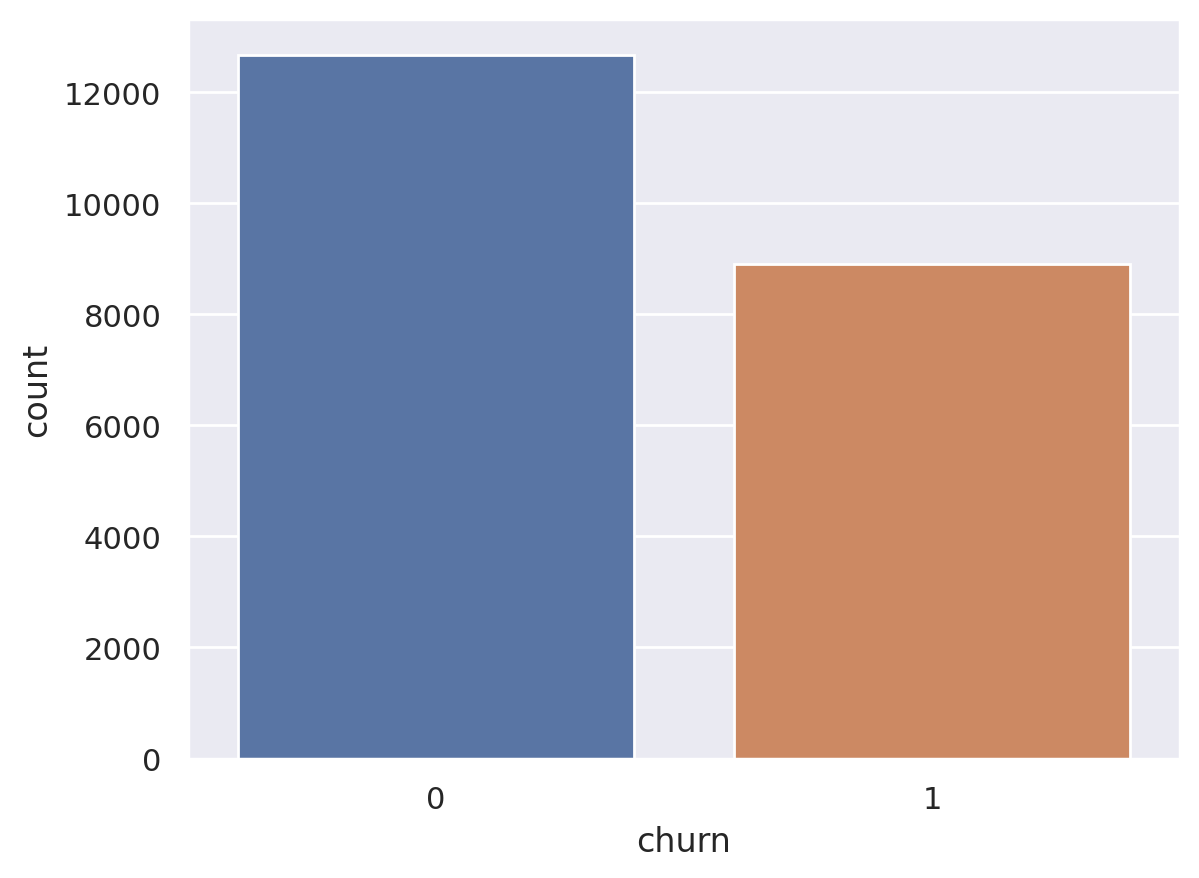

In [14]:
####### 1. Verify class dfChurnBankistribution #######

# Is it balanced? How is the ratio distribution?
# What is the type of class? 
# Plot the distribution
 

sns.countplot(x='churn', data=df)

class_ratio_0 = Counter(df['churn'])[0]/df['churn'].shape[0]
class_ratio_1 = Counter(df['churn'])[1]/df['churn'].shape[0]

print('Class Ratio of {:} is {:.2f}'.format(list(Counter(df['churn']).keys())[0], class_ratio_0))
print('Class Ratio of {:} is {:.2f}'.format(list(Counter(df['churn']).keys())[1], class_ratio_1))
print('Class Ratio of 1 over 0 is {:.2f}'.format(class_ratio_1/class_ratio_0))

In [15]:
####### 2. Checking Null values #######

null_finder = df.isnull().sum()

print(" ***** Number of Null Values by row: ***** ")
null_finder.where(null_finder > 0).dropna()

 ***** Number of Null Values by row: ***** 


age                  4.0
credit_score      6436.0
rewards_earned    2569.0
dtype: float64

In [16]:
####### 3. Dataframe data type analysis #######
df.dtypes

churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned             float64
reward_rate         

In [17]:
# Separation of data types for EDA

cat_features = df.select_dtypes(exclude = np.number).columns
num_features = df.select_dtypes(include = np.number).columns
print( "Quantity of Categorical features: ", len(cat_features),"\nCategorical features: ", cat_features)
print( "\nQuantity of Numerical features: ", len(num_features),"\nNumerical features: ", num_features)

Quantity of Categorical features:  3 
Categorical features:  Index(['housing', 'payment_type', 'zodiac_sign'], dtype='object')

Quantity of Numerical features:  27 
Numerical features:  Index(['churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred'],
      dtype='object')


In [18]:
# Categorical analysis:

print("Quantity values: " ,list(map(lambda col: (col,len(df[col].value_counts())), df.select_dtypes(exclude = np.number).columns)))

print("\nhousing feature values: ", df['housing'].unique() ,
      "\npayment_type feature value: ", df['payment_type'].unique() ,
      "\nzodiac_sign feature values: ", df['zodiac_sign'].unique())

Quantity values:  [('housing', 3), ('payment_type', 5), ('zodiac_sign', 13)]

housing feature values:  ['R' 'na' 'O'] 
payment_type feature value:  ['Bi-Weekly' 'Monthly' 'na' 'Weekly' 'Semi-Monthly'] 
zodiac_sign feature values:  ['Virgo' 'Sagittarius' 'Aries' 'Scorpio' 'Cancer' 'Pisces' 'na'
 'Capricorn' 'Aquarius' 'Libra' 'Leo' 'Taurus' 'Gemini']


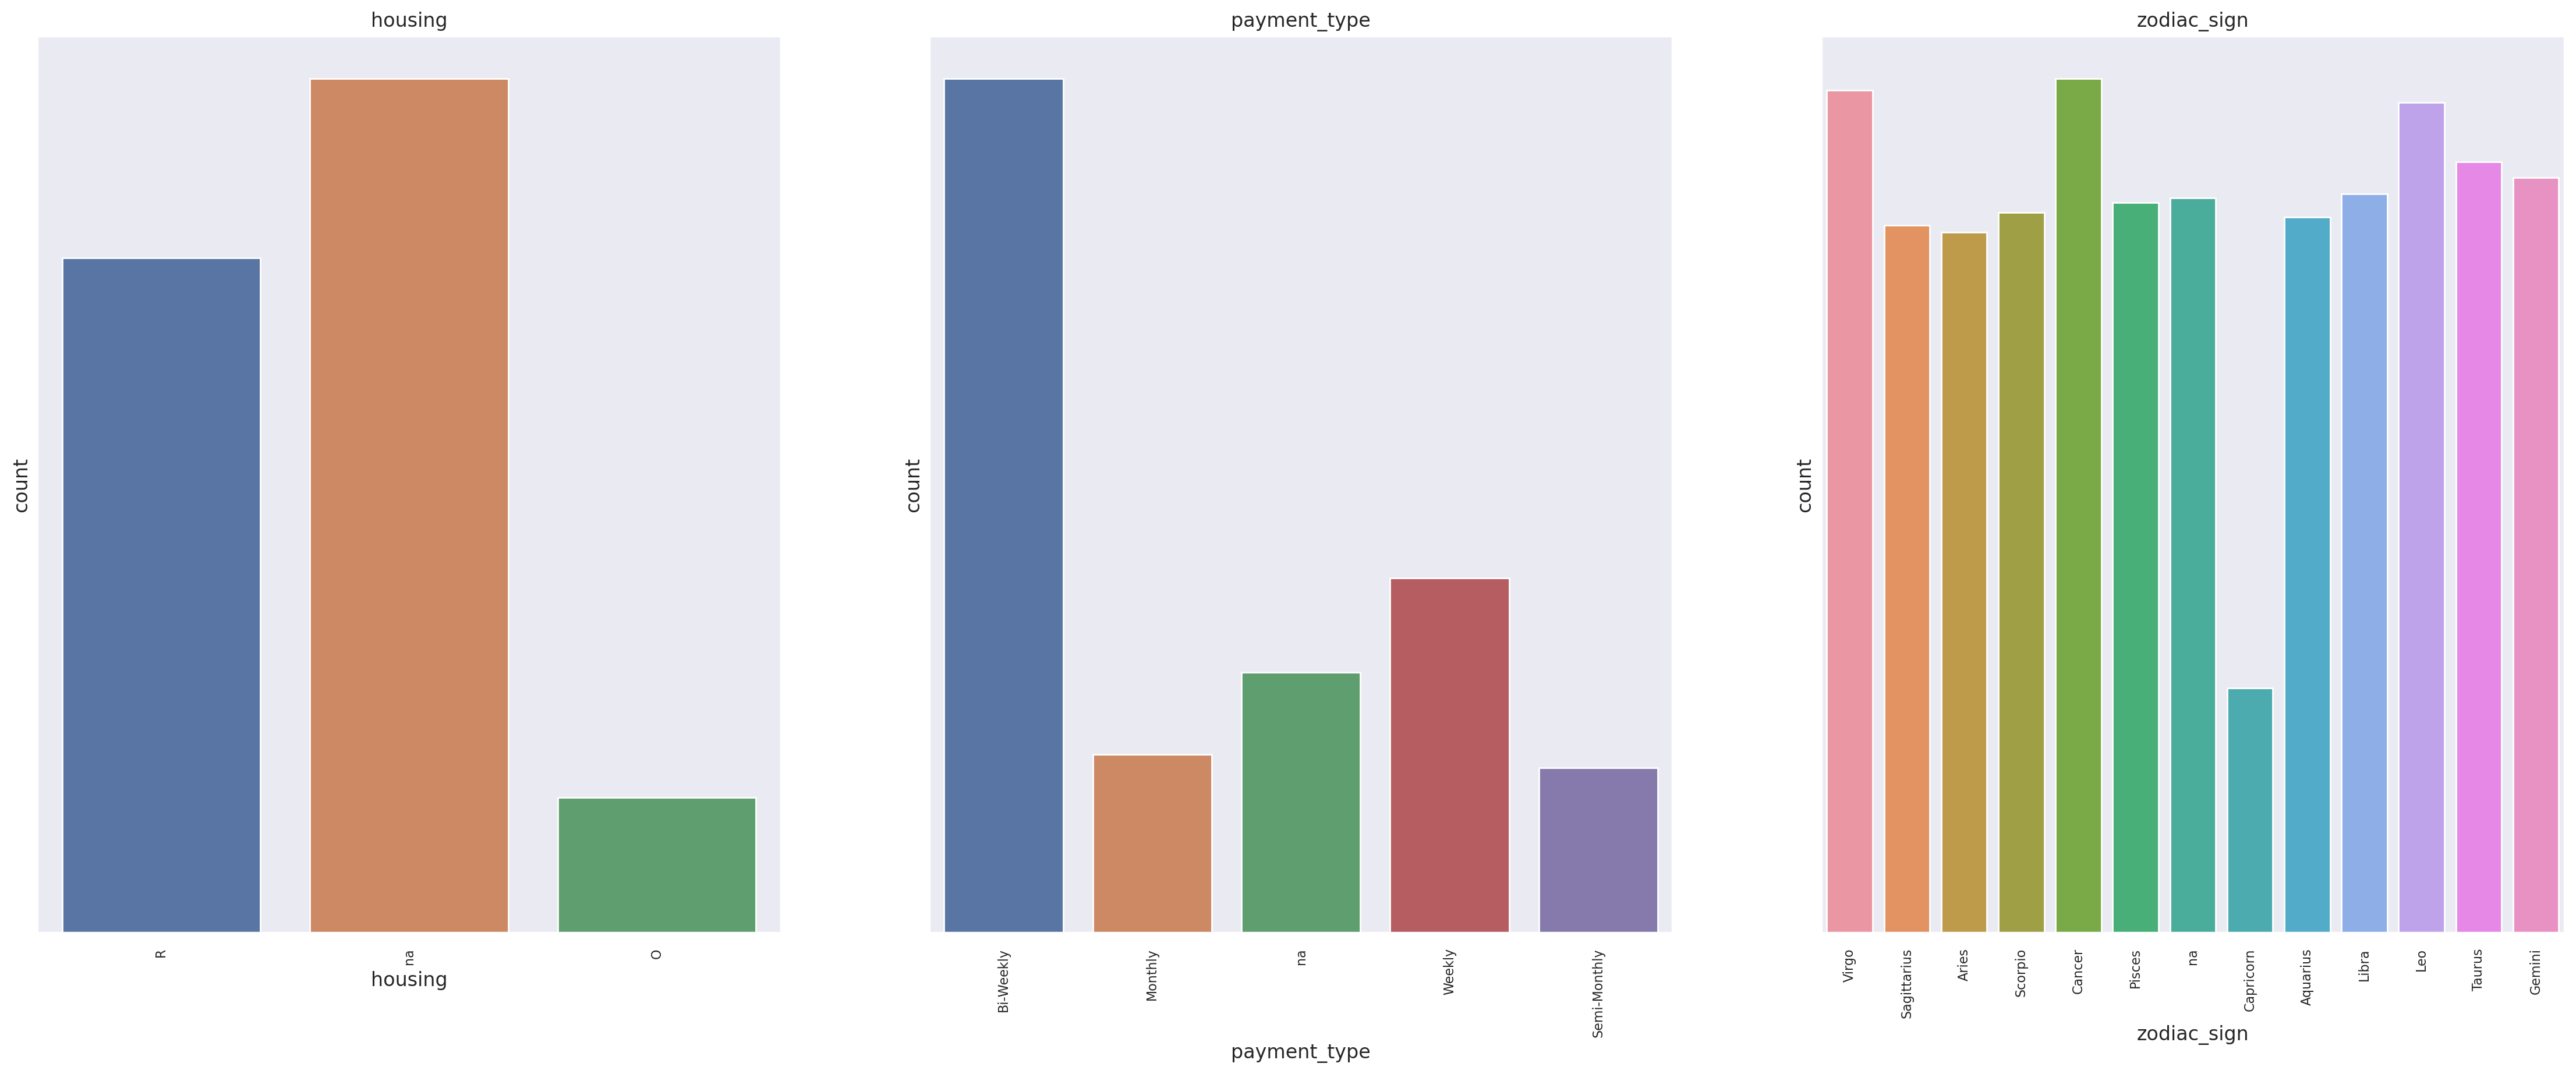

In [19]:

fig, axs = plt.subplots(1, len(cat_features), figsize=(28, 10))

for col, ax in enumerate(axs.flatten()):
    sns.countplot(x=cat_features[col], data=df, ax = axs[col])
    ax.set_title(cat_features[col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_yticks([])

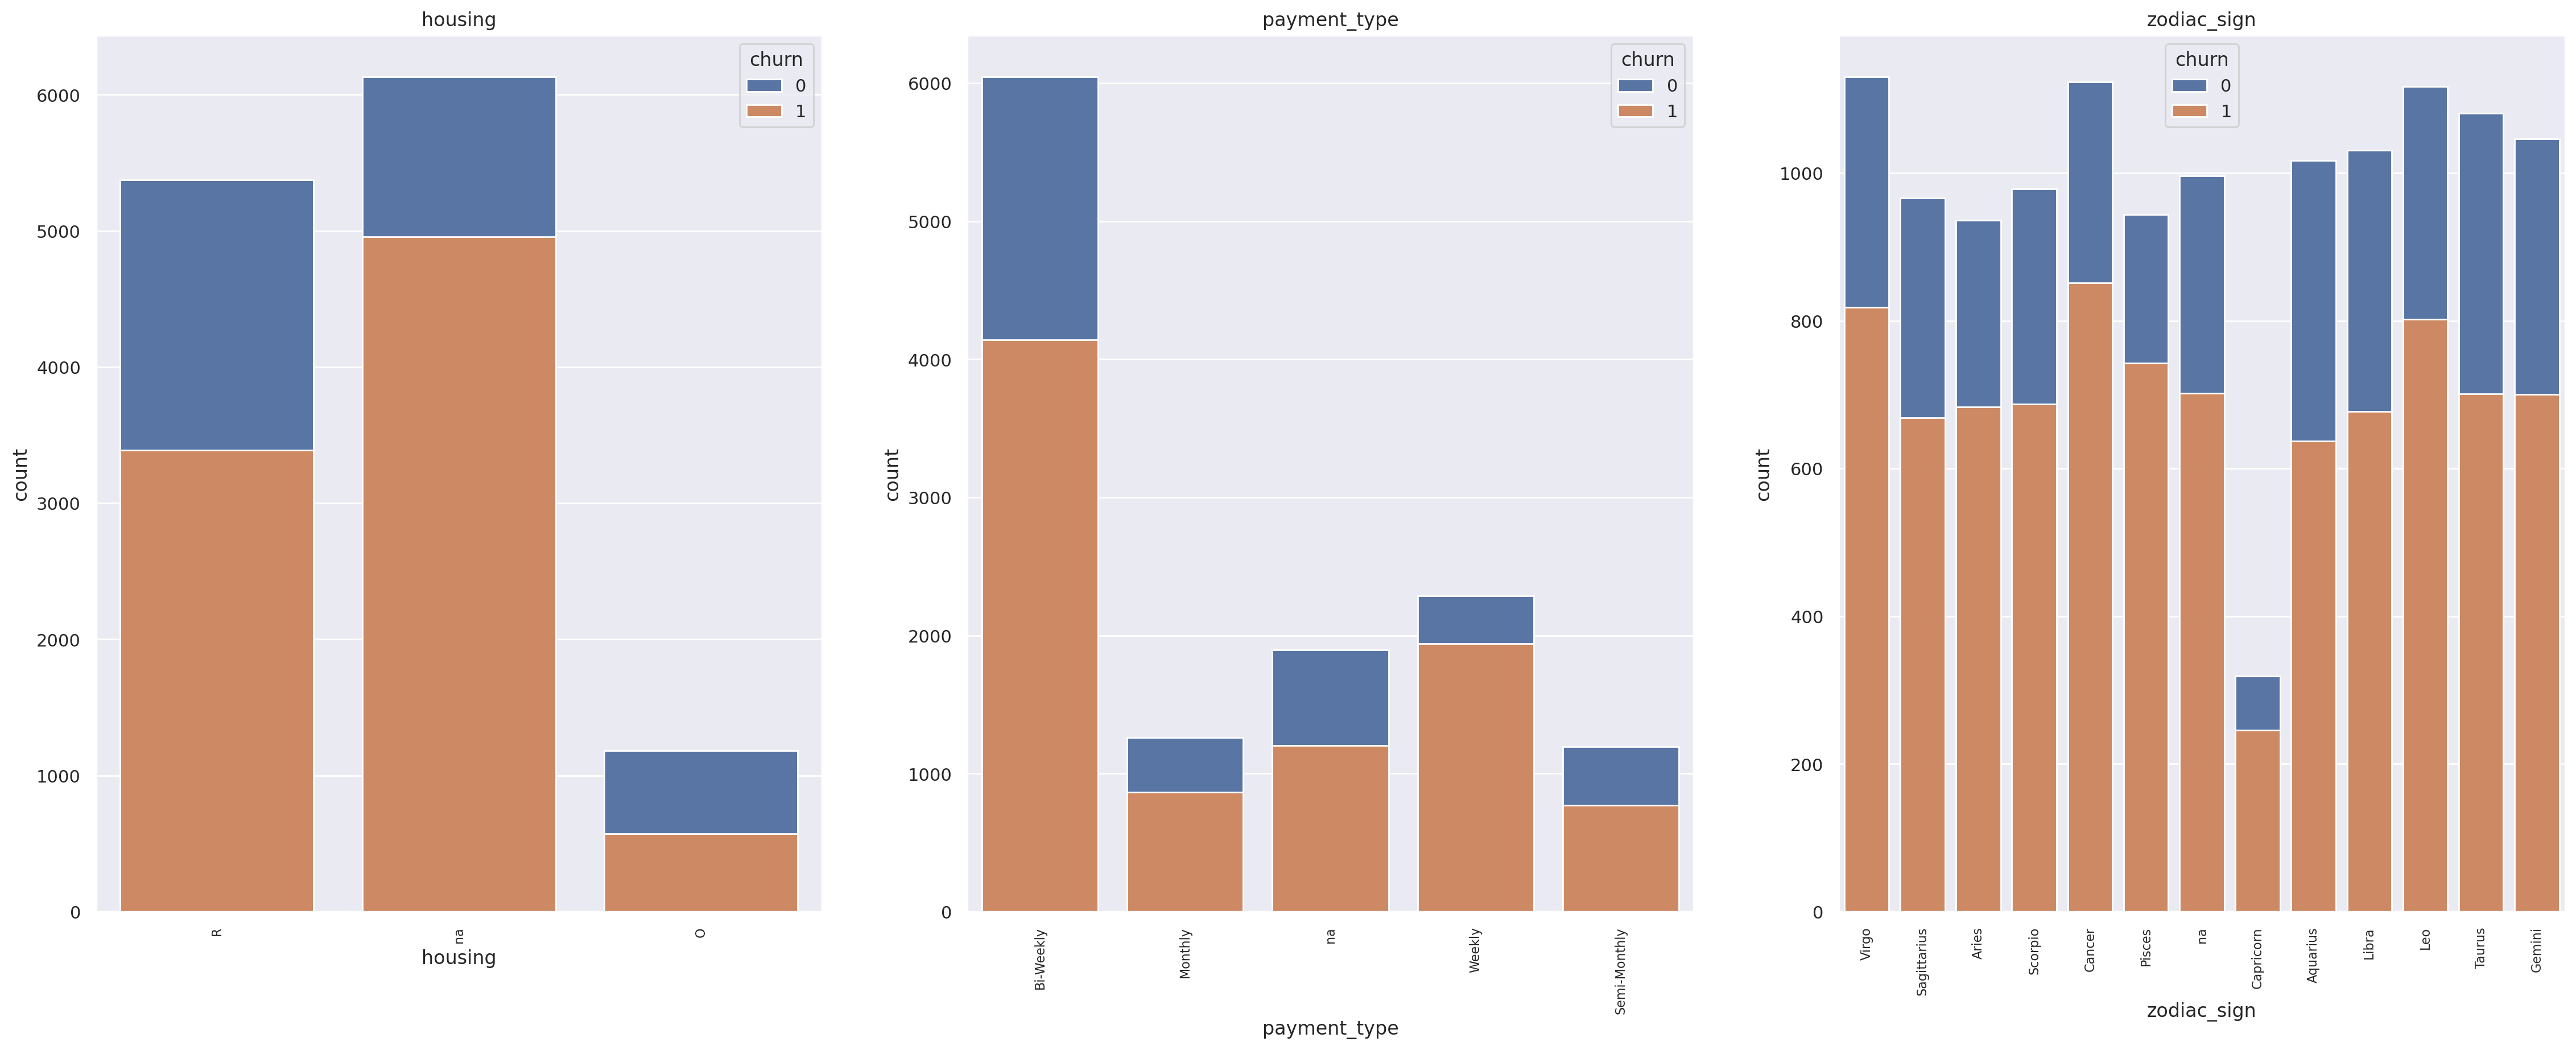

In [20]:
# Analysis each categorical feature by churn quantity in order to know which one is more relevant than other.

fig, axs = plt.subplots(1, len(cat_features), figsize=(28, 10))

for col, ax in enumerate(axs.flatten()):
    sns.countplot(x=cat_features[col], hue='churn', dodge=False, data=df, ax = axs[col])
    ax.set_title(cat_features[col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

In [21]:
# Numerical analysis:
list(map(lambda col: (col,len(df[col].value_counts())), df.select_dtypes(include = np.number).columns))

[('churn', 2),
 ('age', 70),
 ('credit_score', 446),
 ('deposits', 66),
 ('withdrawal', 20),
 ('purchases_partners', 281),
 ('purchases', 64),
 ('cc_taken', 11),
 ('cc_recommended', 324),
 ('cc_disliked', 20),
 ('cc_liked', 8),
 ('cc_application_begin', 123),
 ('app_downloaded', 2),
 ('web_user', 2),
 ('app_web_user', 2),
 ('ios_user', 2),
 ('android_user', 2),
 ('registered_phones', 5),
 ('waiting_4_loan', 2),
 ('cancelled_loan', 2),
 ('received_loan', 2),
 ('rejected_loan', 2),
 ('left_for_two_month_plus', 2),
 ('left_for_one_month', 2),
 ('rewards_earned', 87),
 ('reward_rate', 186),
 ('is_referred', 2)]